In [1]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Effectuons certaines tâches à comprendre les données comme shape, infoet describe.

In [2]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Le shape de notre ensemble de données est

In [3]:
advertising.shape

(200, 4)

## Visualiser les données
Visualisons les données à l'aide de la bibliothèque matploliband seaborn. Nous allons faire une paire de toutes les colonnes et voir à quelles colonnes sont les plus corrélées à Sales.

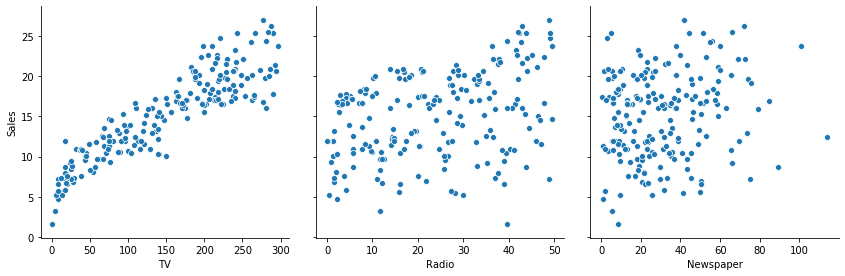

In [5]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

Nous pouvons egalement déterminer la corrélation à l'aide d'un nuage de points, nous pouvons utiliser la carte thermique Seaborn pour visualiser les données.

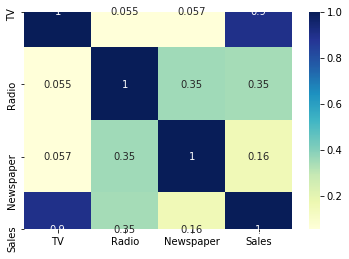

In [6]:
#Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

la colonne TV semble la plus corrélée aux ventes.

Exécutons le modèle de régression linéaire simple en utilisant TV comme variable de fonction.

## Exécution d'une régression linéaire simple

Équation de régression linéaire simple
y = c + mX

Dans notre cas:
y = c + m * TV
Les valeurs m sont appelées coefficients de modèle ou paramètres de modèle.

Nous allons effectuer une régression linéaire simple en quatre étapes.

- Créer X et y
- Créer un train et un ensemble de test
- Entraînez votre modèle
- Évaluer le modèle

Pour généraliser, La variable indépendante représente X et y représente la variable cible dans un modèle de régression linéaire simple.

In [7]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

## Créer des ensembles d'entrainement et de test
Nous devons diviser nos variables en ensembles d'entrainement et de test. À l'aide de l'ensemble d'entraînement, nous allons créer le modèle et exécuter le modèle sur l'ensemble de test. Nous allons diviser les ensembles d'entraînement et de test dans un rapport de 80% et 20%, respectivement.

Nous allons diviser les données en les important train_test_split depuis la sklearn.model_selection bibliothèque.

In [8]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

Affichons l'ensemble de données d'entraînement,

In [9]:
# Take a look at the train dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

## Construction et entraînement du modèle
En utilisant les deux packages suivants, nous pouvons créer un modèle de régression linéaire simple.
  
  - statsmodel
  - sklearn
  
Par défaut, la  bibliothèque statsmodel ajuste une ligne qui passe par l'origine. Mais si nous observons l'équation de régression linéaire simple y = c + mX, elle a une valeur d'interception comme c. Donc, pour avoir une interception, nous devons ajouter l'attribut add_constant manuellement.

In [10]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

Une fois que nous avons ajouté la constante, nous pouvons ajuster la ligne de régression en utilisant la méthode OLS(Ordinary Least Square) présente dans le statsmodel. Après cela, nous verrons les paramètres, c'est-à-dire c et m de la ligne droite.

In [11]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [12]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.52e-52
Time:                        18:47:56   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

allons-y et visualisons dans quelle mesure la ligne droite s'adapte au nuage de points entre TV et les colonnes Sales.

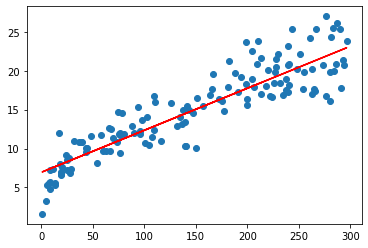

In [13]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Analyse résiduelle
L'une des principales hypothèses du modèle de régression linéaire est que les termes d'erreur sont normalement distribués.

  Error = Actual y value - y predicted value
  
Maintenant, à partir de l'ensemble de données, nous devons prédire la valeur y à partir de l'ensemble de données d'entraînement de X en utilisant l'attribut predict. Ensuite, nous créerons les termes d'erreur (Résiduels) à partir des données prédites.

In [14]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Maintenant, traçons l'histogramme des résidus et voyons si cela ressemble à une distribution normale ou non.

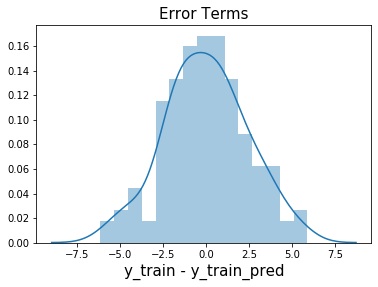

In [15]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

les résidus suivent le graphe de distribution normale avec une moyenne de 0.

Maintenant, assuron-nous que les résidus ne suivent aucun modèle spécifique.

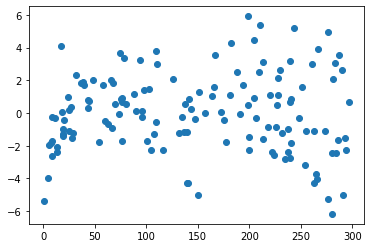

In [16]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Étant donné que les résidus suivent une distribution normale et ne suivent aucun modèle spécifique, nous pouvons utiliser le modèle de régression linéaire que nous avons construit pour évaluer les données de test.

## Prédictions sur les données de test ou évaluation du modèle

Maintenant que nous avons ajusté la droite de régression sur notre jeu de données de train, nous pouvons faire des prédictions sur les données de test. Semblable à l'ensemble de données d'entraînement, nous devons tester les données et prédire les valeurs y en utilisant l' attribut predict présent dans le statsmodel.

In [17]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

Maintenant, calculons la R² valeur des valeurs y prédites ci-dessus. Nous pouvons le faire en important simplement la r2_score bibliothèque à partir du package sklearn.metrics.

In [18]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245658

Visualisons la ligne sur les données de test.

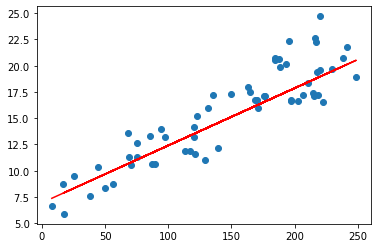

In [19]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

En dehors de statsmodel, nous pouvons construire un modèle de régression linéaire en utilisant sklearn. En utilisant la linear_modelbibliothèque de sklearn, nous pouvons créer le modèle.

Similaire à statsmodel, nous allons diviser les données en trainet test.

In [20]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [21]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


Maintenant, ajustons la ligne au tracé en important la LinearRegressionbibliothèque depuis le sklearn.linear_model.

In [22]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Maintenant, trouvons les coefficients du modèle.

In [23]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


L'équation en ligne droite que nous obtenons pour les valeurs ci-dessus est:
Sales = 6.948 + 0.054 * TV
Si nous observons, l'équation que nous avons obtenue ici est la même que celle que nous avons obtenue dans le statsmodel.

Après cela, nous ferons les prédictions et sur les données et évaluerons le modèle en comparant les valeurs R².

In [24]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


Identique à la statesmodel, la valeur R² sur les données de test est à moins de 5% de la valeur R² sur les données d'apprentissage.

## conclusion
Comme nous l'avons vu, nous pouvons construire un modèle de régression linéaire en utilisant soit a statsmodelou sklearn.

Nous devons nous assurer de suivre ces cinq étapes pour construire le modèle de régression linéaire simple:

- Lire et comprendre le données
- Visualiser les données
- Effectuer une régression linéaire simple
- Analyse résiduelle
- Prédictions sur l'ensemble de test